In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/My Drive/ML_Library')

In [4]:
from algorithms.NN_binary import NeuralNetwork

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
train_data = pd.read_csv('/content/drive/My Drive/ML_Library/datasets/nn_train.csv')
X = train_data.drop(columns=['ID', 'binary_label', 'class_label']).values
y = train_data['binary_label'].values.reshape(-1, 1)


In [7]:
input_dim = X.shape[1]
hidden_dim = 4  # Number of neurons in the hidden layer
output_dim = 1  # Binary output

In [9]:
nn = NeuralNetwork(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, learning_rate=0.01, iterations=100)
nn.train(X, y)

Iteration 0 | Cost: 0.6931866718216249


In [10]:
print(f'Final Cost = {nn.cost_history[-1]}')

Final Cost = 0.690400423157344


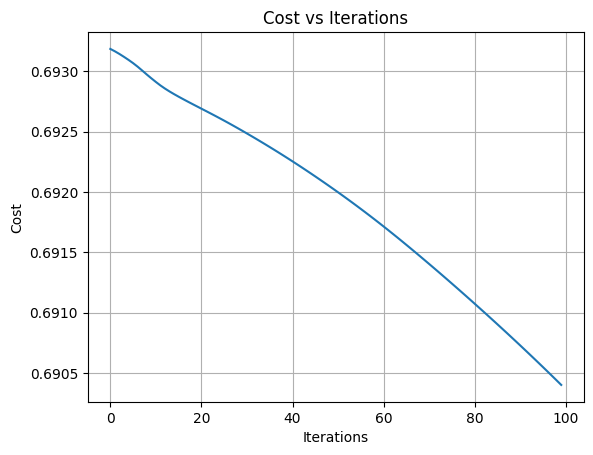

In [11]:
# Plot cost vs iterations
plt.plot(range(len(nn.cost_history)), nn.cost_history)
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid()
plt.show()

In [12]:
y_pred = nn.predict(X)

In [13]:
from sklearn.metrics import f1_score
# Compute F1 score
f1 = f1_score(y, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.6512859915884827


In [14]:
test_data = pd.read_csv('/content/drive/My Drive/ML_Library/datasets/nn_test.csv')

In [15]:
X_test = test_data.drop(columns=['ID']).values

In [16]:
y_pred_test = nn.predict(X_test)

In [17]:
# Convert y_hat to a DataFrame
# Assuming y_hat is a NumPy array or list
predictions = pd.DataFrame(y_pred_test, columns=['predicted_label'])

# Save to a CSV file in Google Drive
file_path = '/content/drive/MyDrive/ML_Library/datasets/NN_test_predictions.csv'
predictions.to_csv(file_path, index=False)

print(f"Predictions saved to: {file_path}")

Predictions saved to: /content/drive/MyDrive/ML_Library/datasets/NN_test_predictions.csv


In [18]:
print(predictions.shape)

(20000, 1)
